比赛页面：https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

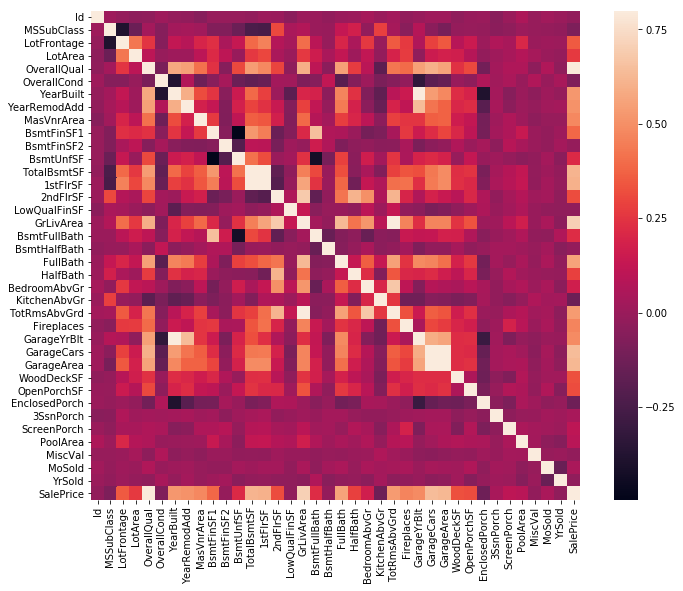

In [5]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [40]:
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


[[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055
  0.60585218 0.56066376 0.53372316 0.52289733]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176 0.5378085
  0.47622383 0.55059971 0.42745234 0.57232277]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748 0.4548682
  0.56602397 0.63001165 0.82548937 0.19900971]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541 0.43458483
  0.43931681 0.46967204 0.36228857 0.53785009]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.         0.48666546
  0.48978165 0.40565621 0.33782212 0.47895382]
 [0.61358055 0.5378085  0.4548682  0.43458483 0.48666546 1.
  0.81952998 0.32372241 0.28557256 0.391452  ]
 [0.60585218 0.47622383 0.56602397 0.43931681 0.48978165 0.81952998
  1.         0.38063749 0.40951598 0.28198586]
 [0.56066376 0.55059971 0.63001165 0.46967204 0.40565621 0.32372241
  0.38063749 1.         0.55478425 0.46827079]
 [0.53372316 0.42745234 0.82548937 0.36228857 0.33782212 0.28557256
  0.40951598 0.5547842

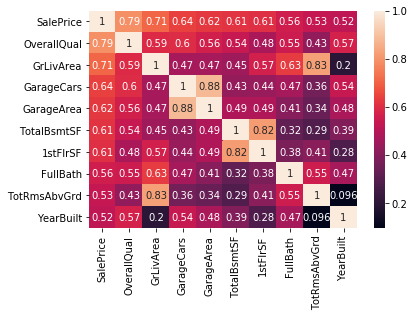

In [41]:
# 注意数据需要转置
cm = np.corrcoef(train[cols].values.T)
print(cm)
sns.heatmap(cm,cbar=True,annot=True,yticklabels=cols.values, xticklabels=cols.values)



通过上面的结果可以知道“SalePrice”没有无效或者其他非数值的数据，下面通过图示化来进一步展示“SalePrice”


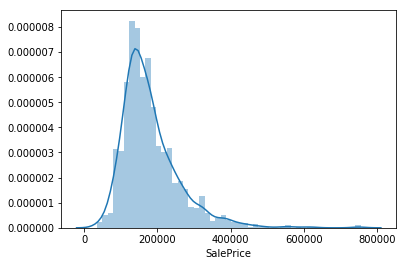

In [8]:
sns.distplot(train['SalePrice'])

In [9]:
print("偏度： %f " % train['SalePrice'].skew())
print("斜度： %f"  % train['SalePrice'].kurt())

偏度： 1.882876 
斜度： 6.536282


由上图可以知道房价呈现正态分布。下面还可以看到两个统计学中的概念： 峰度（Kurtosis）和 偏度（Skewness）。

    峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。

    它是和正态分布相比较的。

        Kurtosis=0 与正态分布的陡缓程度相同。

        Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰

        Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 偏度：

    偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

        Skewness=0 分布形态与正态分布偏度相同
        Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
        Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。


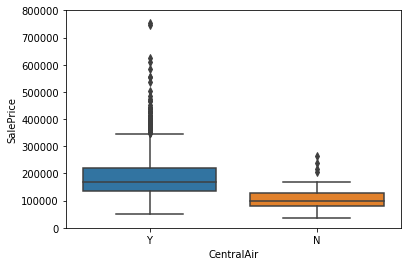

In [10]:
# CentralAir
var = 'CentralAir'
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

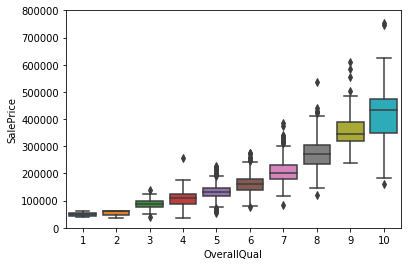

In [11]:
var = 'OverallQual'
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

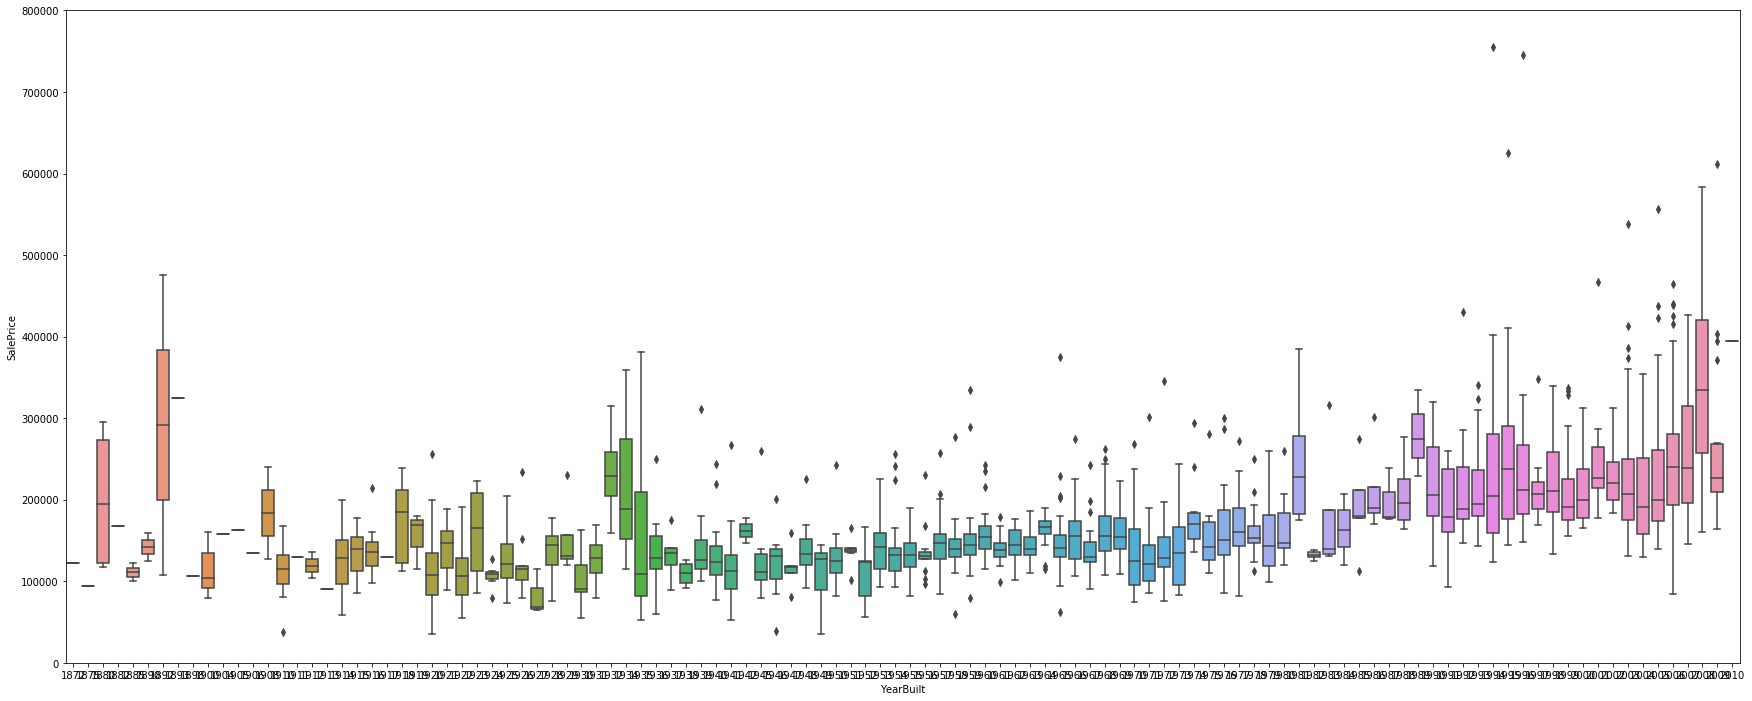

In [12]:
# YearBuilt boxplot
var = 'YearBuilt'
f, ax = plt.subplots(figsize=(30, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000);

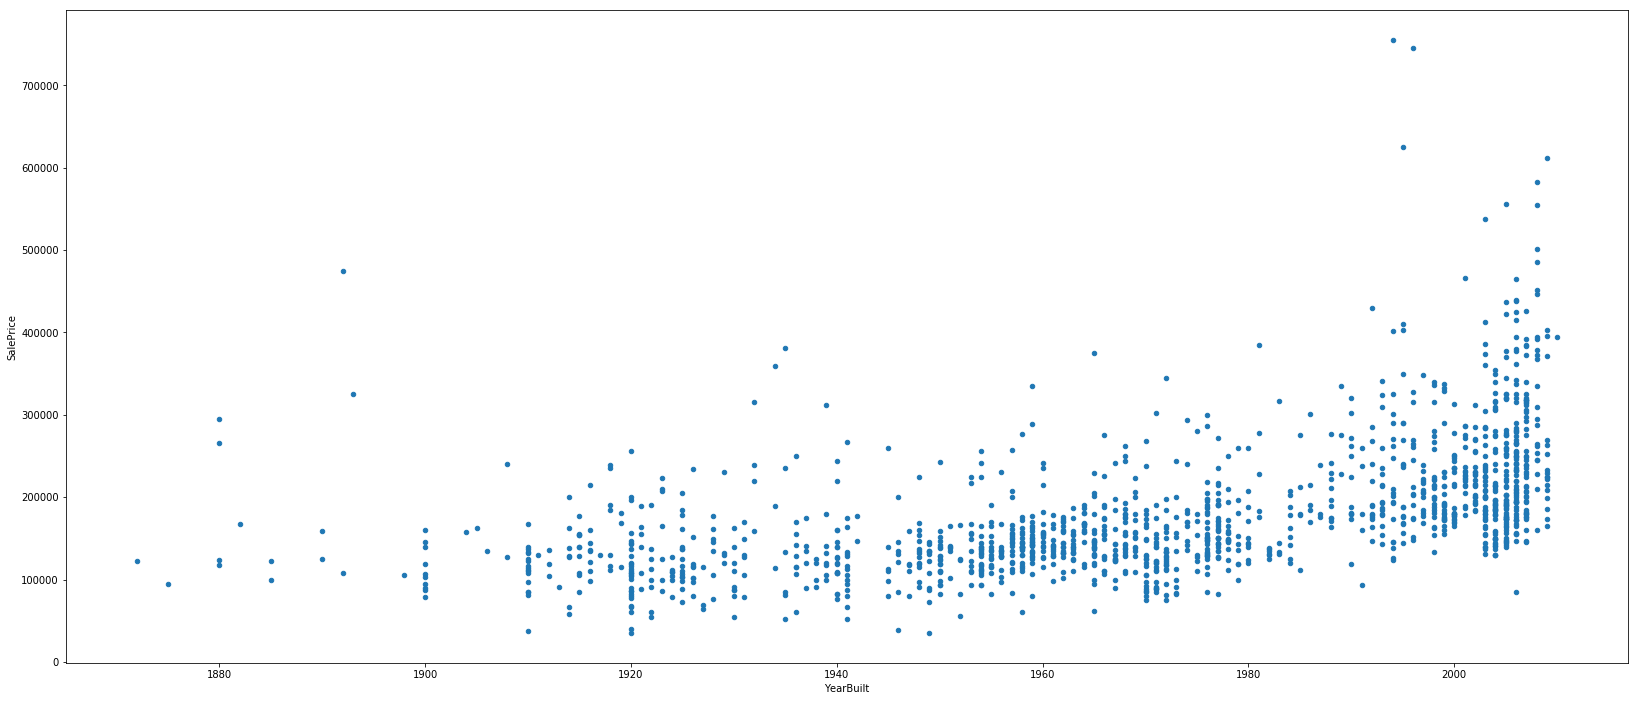

In [13]:
var = 'YearBuilt'
fig, ax = plt.subplots(figsize=(28, 12))
train.plot.scatter(x=var, y="SalePrice", ax=ax)

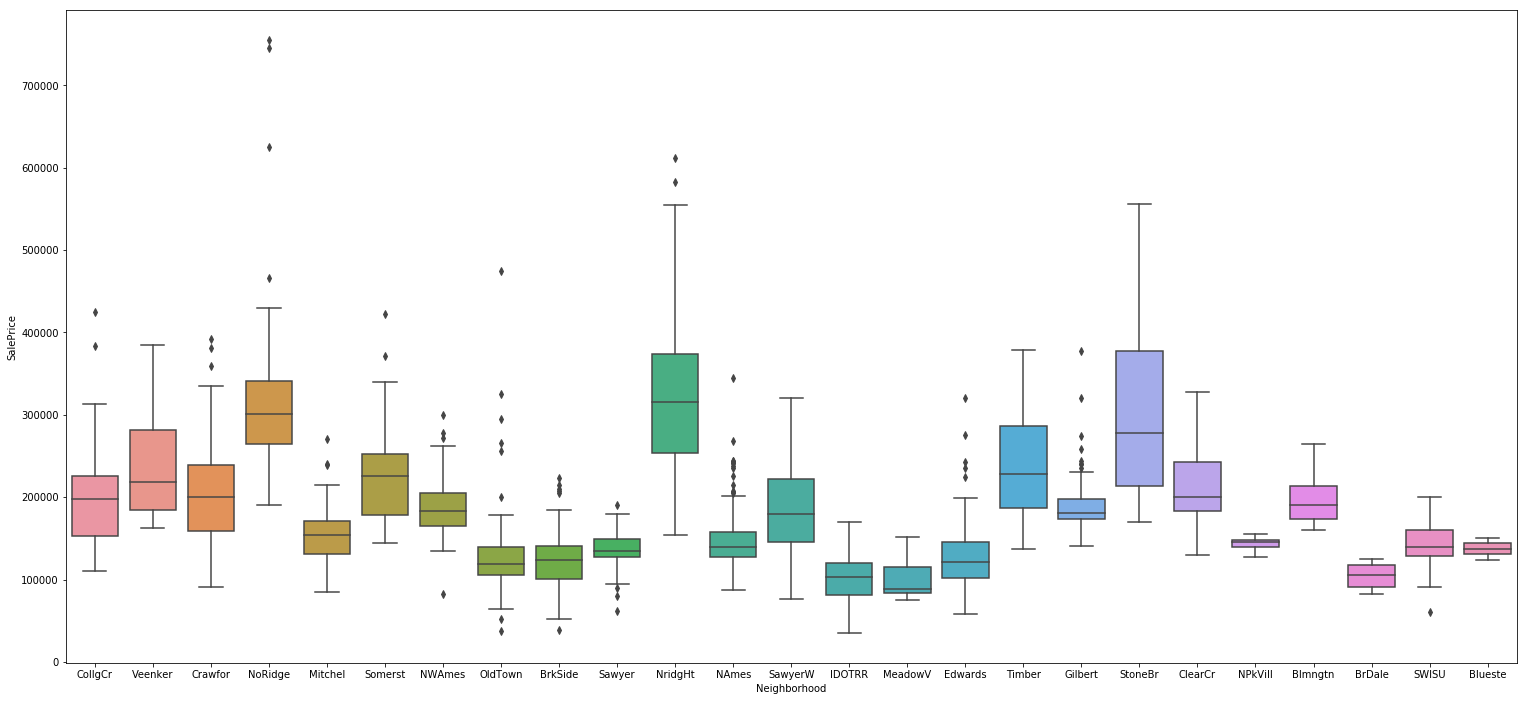

In [14]:
# Neighborhood
var = 'Neighborhood'
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=train)

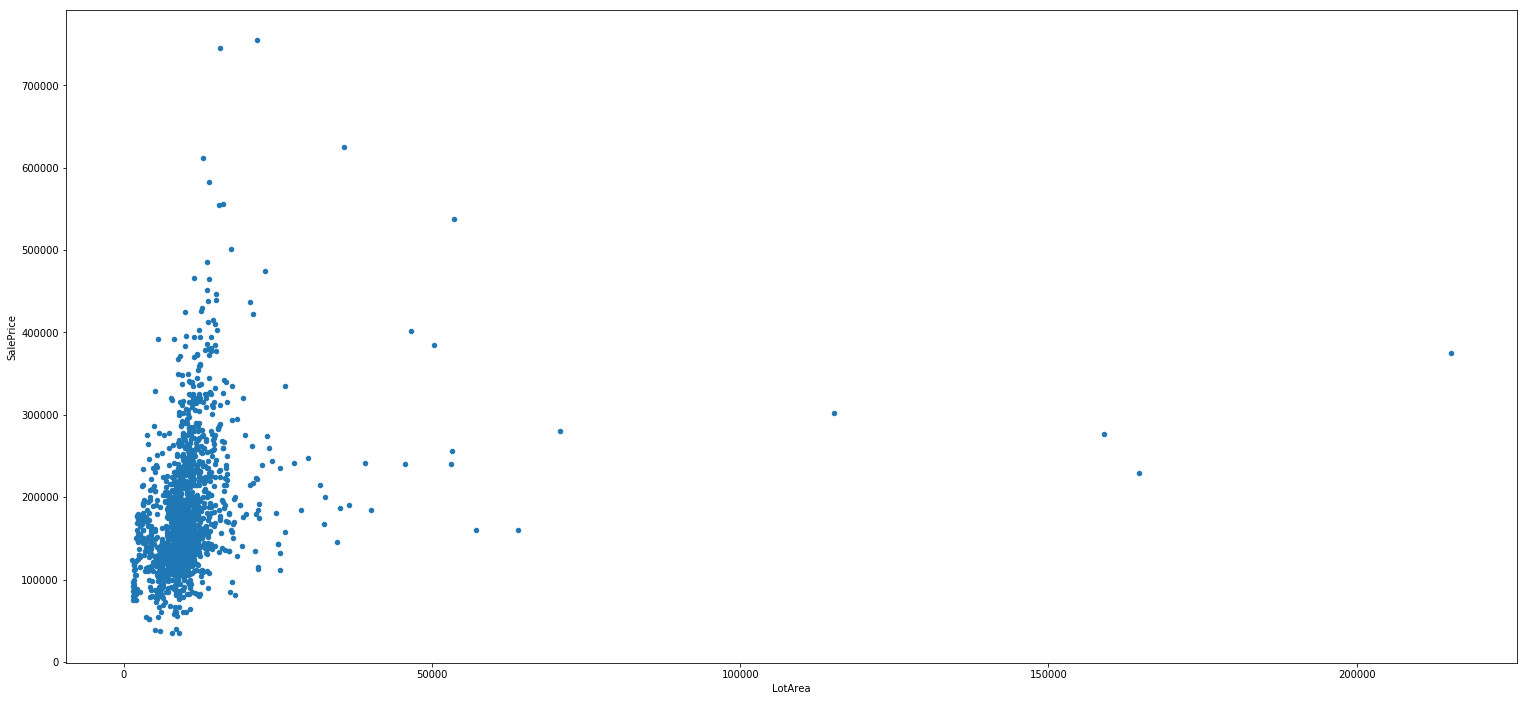

In [15]:
var  = 'LotArea'
fig, ax = plt.subplots(figsize=(26, 12))
train.plot.scatter(x=var, y='SalePrice',ax=ax)

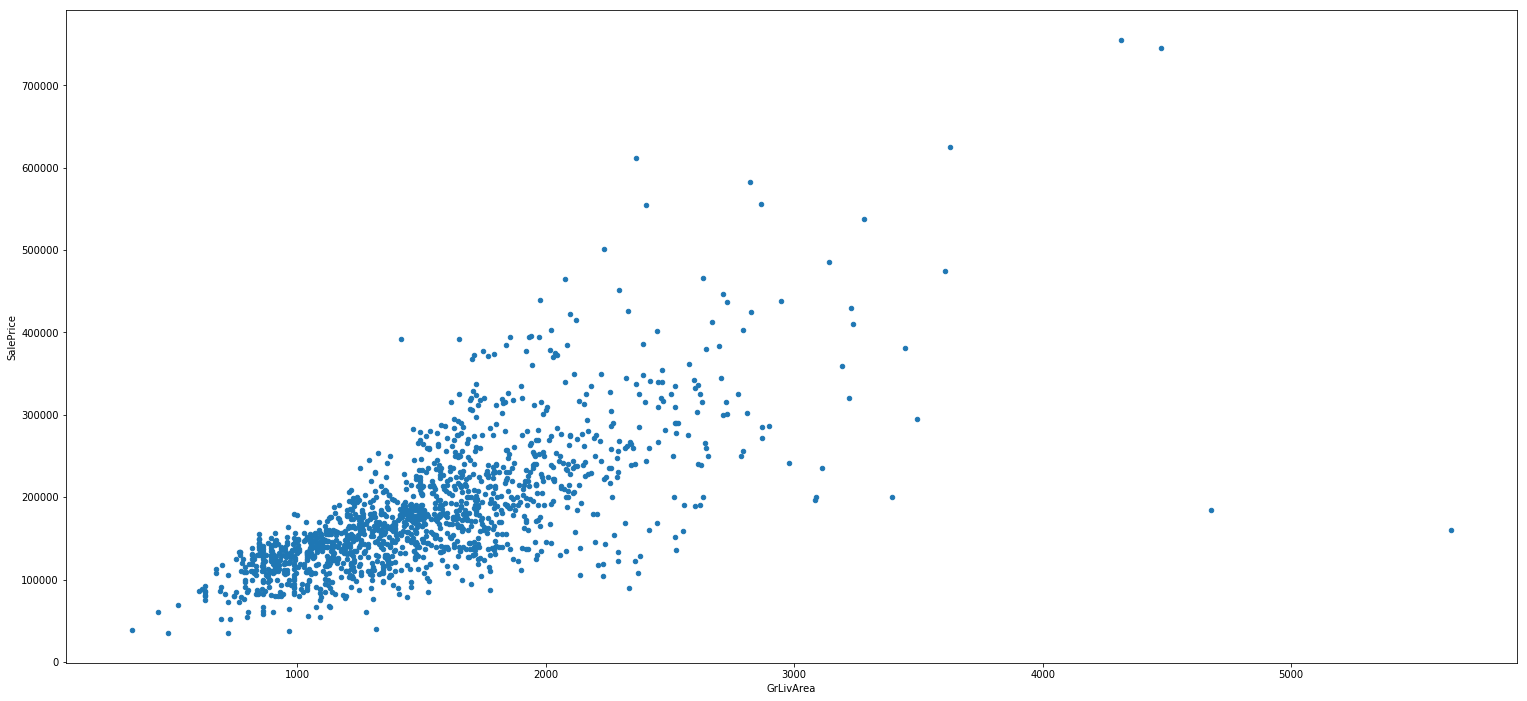

In [16]:
var  = 'GrLivArea'
fig, ax = plt.subplots(figsize=(26, 12))
train.plot.scatter(x=var, y='SalePrice',ax=ax)

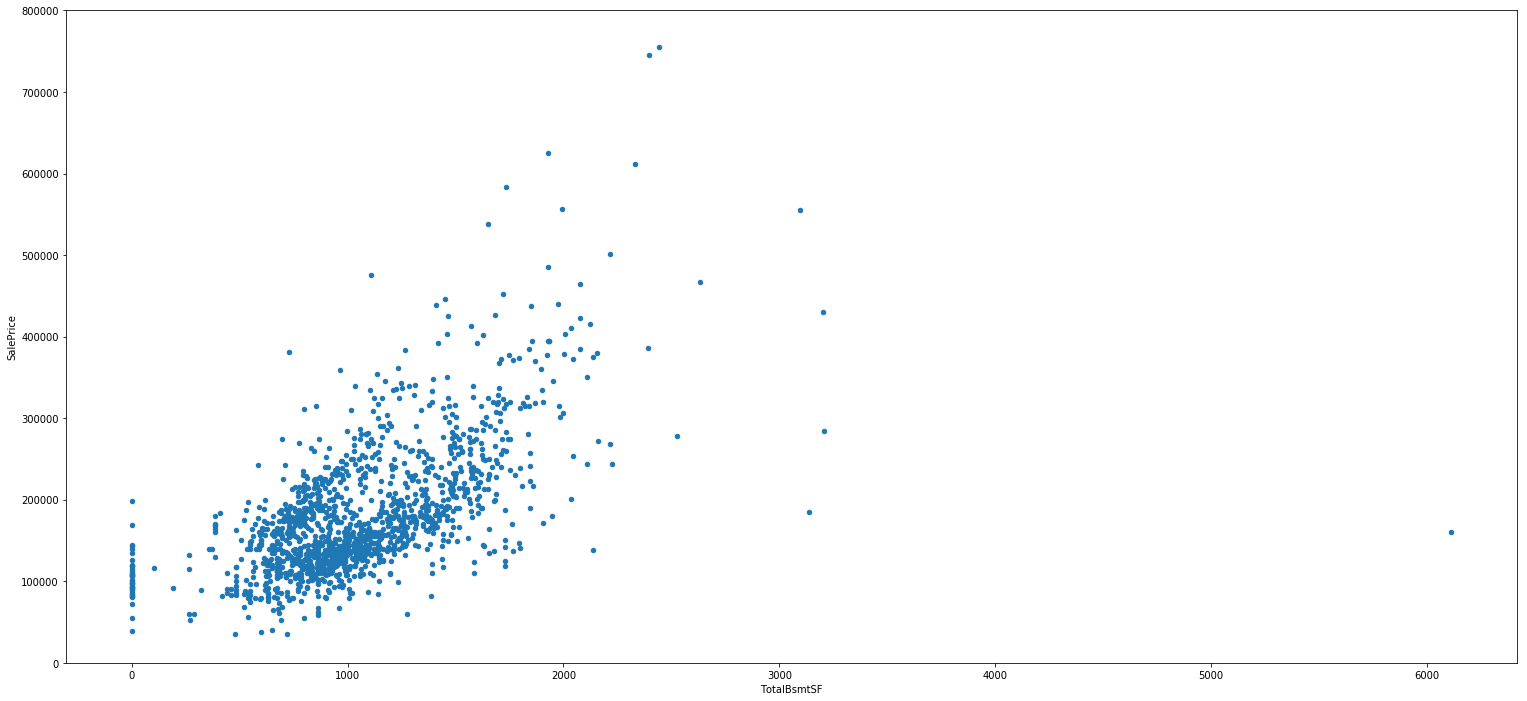

In [35]:
var  = 'TotalBsmtSF'
fig, ax = plt.subplots(figsize=(26, 12))
train.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000),ax=ax)

In [42]:
var  = ['GarageArea', 'GarageCars']
for index in range(2):
    train.plot.scatter(x=var[index], y='SalePrice', ylim=(0, 800000),ax=ax)

| Variable | Comments |
| ------ | ------ |
|GrLivArea |	生活面积|
|TotalBsmtSF |	地下室总面积|
|GarageArea/GarageCars| 车库|
|YearBuilt 	|建造年份|
|CentralAir |	中央空调|
|OverallQual | 总体评价|
|Neighborhood 	|	地段|